In [1]:
#importing the libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
#loading the dataset in code
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [5]:
y_test.shape

(10000, 1)

In [6]:
#classification of data
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
#CNN model formation
model=tf.keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)             

In [11]:
#compilation of code
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [12]:
#CNN model training
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 133s 84ms/step - loss: 1.4060 - accuracy: 0.4954 - val_loss: 1.1619 - val_accuracy: 0.5868
Epoch 2/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9976 - accuracy: 0.6499 - val_loss: 0.9691 - val_accuracy: 0.6643
Epoch 3/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.8417 - accuracy: 0.7047 - val_loss: 0.8717 - val_accuracy: 0.6934
Epoch 4/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.7484 - accuracy: 0.7393 - val_loss: 0.8320 - val_accuracy: 0.7132
Epoch 5/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.6671 - accuracy: 0.7677 - val_loss: 0.8694 - val_accuracy: 0.7079
Epoch 6/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.6010 - accuracy: 0.7899 - val_loss: 0.8554 - val_accuracy: 0.7177
Epoch 7/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.5436 - accuracy: 0.8075 - val_loss: 0

In [13]:
#data processing
test_loss, test_acc=model.evaluate(x_test,y_test, verbose=2)
print('Accuracy:', test_acc)

313/313 - 7s - loss: 0.9706 - accuracy: 0.7197 - 7s/epoch - 23ms/step
Accuracy: 0.7196999788284302


In [14]:
#prediction by the model
pred=model.predict(x_test[:100])
print(np.argmax(pred, axis=1))

4/4 [==============================] - 0s 16ms/step
[3 8 0 0 3 3 1 6 3 1 4 9 5 7 9 8 5 7 8 6 7 2 2 9 4 2 4 0 9 6 6 5 2 3 9 9 4
 1 9 5 4 6 5 6 0 9 3 3 7 2 9 8 7 3 8 8 7 5 3 5 7 5 6 9 6 2 1 2 3 7 6 3 8 8
 0 2 7 3 3 8 8 8 1 7 2 7 4 0 8 9 0 6 8 6 4 6 2 0 0 3]


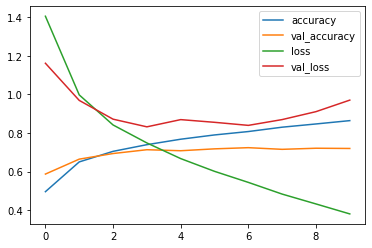

In [16]:
#plotting the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()